# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  

## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 11](#task11)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [6]:
# your code here
for col in data:
    print(data[col].unique())
#исправляю опечатки
data['sex'] = data['sex'].replace(['m'], 'M')
data['Pstatus'] = data['Pstatus'].replace(['t'], 'T')
data['Medu'] = data['Medu'].replace(['o'], '0')
data['Fedu'] = data['Fedu'].replace(['o'], '0')
data['Mjob'] = data['Mjob'].replace(['at-home'], 'at_home')
data['Fjob'] = data['Fjob'].replace(['at-home'], 'at_home')
data['guardian'] = data['guardian'].replace(['futher'], 'father')

# меняю все 'yes' и 'no' на 1 и 0, соответственно. для упрощения дальнейших манипуляций
data = data.replace(['yes'], 1)
data = data.replace(['no'], 0)

# делаю категориальные признаки категориальными 
# столбцы 'romantic', 'famrel', 'Dalc', 'Walc' тоже буду приведены к категориальным позже, потому что 
# в них есть пропуски, с которыми нужно разобраться до категоризации (это будет проделано в задании 2)
cats = [n for n in data.columns.to_list() if n not in ['ID', 'absences', 'internet', 'higher', 'nursery', 
                                                       'activities', 'paid', 'famsup', 'schoolsup', 'G1', 'G2', 'G3',
                                                       'Subject',
                                                       'romantic', 
                                                       'famrel', 'Dalc', 'Walc']]
for n in cats:
    data[n] = data[n].astype('category')
    
data.info()

[100097 101021 102965 ... 998425 999143 999194]
['Por' 'Math']
['GP' 'MS']
['F' 'M' 'm']
[16 17 18 15 19 21 20 22]
['U' 'R']
['GT3' 'LE3']
['A' 'T' 't']
['3' '1' '2' '4' '0' 'o']
['4' '2' '3' '1' 'o' '0']
['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
['course' 'home' 'reputation' 'other']
['father' 'mother' 'other' 'futher']
[1 2 3 4]
[1 2 4 3]
[0 2 1 3]
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['yes' 'no']
['no' nan 'yes']
[ 3.  5.  4.  1.  2. nan]
[2 3 4 1 5]
[1 4 5 3 2]
[ 1.  3.  4.  2.  5. nan]
[ 4.  3.  5.  1.  2. nan]
[5 3 4 2 1]
[12  2  0  4  6 10  7 20 14 11 24  8 16 21  1 18  5 22  9  3 15 26 25 54
 56 40 19 13 38 30 17 28 32 23 75]
[nan 'yes' 'no']
[15 17  9 14 12 11 13  7 16  6  8 10 18  0  5  3  4 19]
[13 18  8 15 11 12 14  6 10 16  5  7  9 17  0  4 19]
[14 17 10 16 13 12  9  6 11  8 18 15  0  5  7 19  4  1 20]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [7]:
# your code here
print(data.isnull().any(axis=0))
# в столбце romantic nan меняю на No, потому что мне это кажется логичным :)
# в famrel меняю nan на среднее значение по столбцу
# в Dalc и Walc тоже
# в столбце cheating можно все nan заменить на No, но учитывая, что тут 70% na, я лучше удалю этот столбец вовсе
data['romantic'] = data['romantic'].fillna(0.0)
for i in ['famrel', 'Dalc', 'Walc']:
    data[i] = data[i].fillna(data[i].mean())

data.drop('cheating', axis=1, inplace=True)
for i in ['romantic', 'famrel', 'Dalc', 'Walc']:
    data[i] = data[i].astype('category')

ID            False
Subject       False
school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic       True
famrel         True
freetime      False
goout         False
Dalc           True
Walc           True
health        False
absences      False
cheating       True
G1            False
G2            False
G3            False
dtype: bool


### Задание 3  
  
Проанализируйте данные на наличие выбросов.   
Сколько наблюдений можно отнести к выбросам по каждому признаку? Сколько всего выбросов в данных?  
  
**Note:** Выбросы можно не удалять из данных. Это информацию можно учитывать в дальнейшем анализе и удалять выбросы при необходимости. 

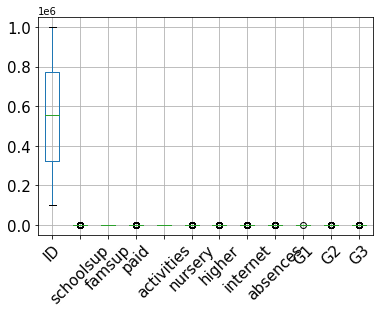

In [8]:
# your code here
boxplot = data.boxplot(rot = 45, fontsize = 15)

### Задание 4 
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

In [9]:
# your code here
data.describe()

,ID,schoolsup,famsup,paid,activities,nursery,higher,internet,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,547057.190613,0.113985,0.613027,0.210728,0.494253,0.799808,0.914751,0.792146,4.434866,11.213602,11.246169,11.341954
std,263827.330362,0.317945,0.487291,0.408021,0.500207,0.400335,0.279386,0.405967,6.210017,2.983394,3.285071,3.864796
min,100097.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,324017.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,9.000000,9.000000,10.000000
50%,554339.500000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,11.000000,11.000000,11.000000
75%,774486.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,6.000000,13.000000,13.000000,14.000000
max,999194.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
cols = [n for n in data.columns if n not in ['ID', 'absences']]
for i in cols:
    print(i,'\n{}'.format(data[i].value_counts()))

Subject 
Por     649
Math    395
Name: Subject, dtype: int64
school 
GP    772
MS    272
Name: school, dtype: int64
sex 
F    591
M    453
Name: sex, dtype: int64
age 
16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64
address 
U    759
R    285
Name: address, dtype: int64
famsize 
GT3    738
LE3    306
Name: famsize, dtype: int64
Pstatus 
T    923
A    121
Name: Pstatus, dtype: int64
Medu 
4    306
2    289
3    238
1    202
0      9
Name: Medu, dtype: int64
Fedu 
2    324
1    256
3    231
4    224
0      9
Name: Fedu, dtype: int64
Mjob 
other       399
services    239
at_home     194
teacher     130
health       82
Name: Mjob, dtype: int64
Fjob 
other       584
services    292
teacher      65
at_home      62
health       41
Name: Fjob, dtype: int64
reason 
course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64
guardian 
mother    728
father    243
other      73
Name: guardian, dtype: int

In [11]:
# Сколько студентов посещают каждую из школ?
print(data['school'].value_counts())

GP    772
MS    272
Name: school, dtype: int64


In [12]:
# Сколько студентов посещают математику, сколько - португальский?
print(data['Subject'].value_counts())

Por     649
Math    395
Name: Subject, dtype: int64


In [13]:
# Студенты какого курса чаще заваливают экзамены?
pd.crosstab(data['Subject'], data['failures'], margins=True)

failures,0,1,2,3,All
Subject,,,,,
Math,312,50,17,16,395
Por,549,70,16,14,649
All,861,120,33,30,1044


In [14]:
# Сколько в среднем времени в неделю уходит на учебу по каждому предмету?
data.studytime = data.studytime.astype('int64')
data.traveltime = data.traveltime.astype('int64')
data.age = data.age.astype('int64')
pd.crosstab(data['Subject'],'mean study time',values=data['studytime'], aggfunc = np.mean) 


col_0,mean study time
Subject,
Math,2.035443
Por,1.930663


In [15]:
# На что чаще обращают внимание при выборе школы?
pd.crosstab(data['school'], data['reason'],  normalize=True)

reason,course,home,other,reputation
school,,,,
GP,0.278736,0.204023,0.051724,0.204981
MS,0.133142,0.043103,0.051724,0.032567


### Задание 5  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

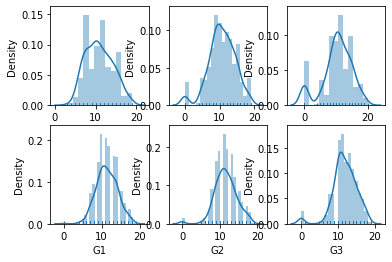

In [16]:
# your code here
plt.subplot(2, 3, 1)
sns.distplot(data[data['Subject'] == 'Math']['G1'], kde=True, rug=True)
plt.subplot(2, 3, 2)
sns.distplot(data[data['Subject'] == 'Math']['G2'], kde=True, rug=True);
plt.subplot(2, 3, 3)
sns.distplot(data[data['Subject'] == 'Math']['G3'], kde=True, rug=True);
plt.subplot(2, 3, 4)
sns.distplot(data[data['Subject'] == 'Por']['G1'], kde=True, rug=True)
plt.subplot(2, 3, 5)
sns.distplot(data[data['Subject'] == 'Por']['G2'], kde=True, rug=True);
plt.subplot(2, 3, 6)
sns.distplot(data[data['Subject'] == 'Por']['G3'], kde=True, rug=True);


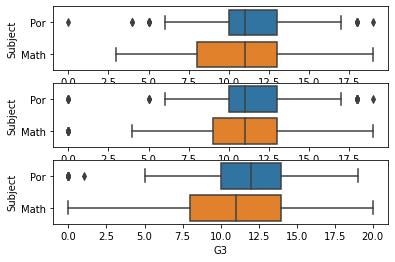

In [17]:
# your code here
plt.subplot(3, 1, 1)
sns.boxplot(x='G1', y='Subject', data=data);
plt.subplot(3, 1, 2)
sns.boxplot(x='G2', y='Subject', data=data);
plt.subplot(3, 1, 3)
sns.boxplot(x='G3', y='Subject', data=data);
# у студентов, изучающих математику плотность равномерная, а у тех, кто изучает португальский - смещена
# так же можно увидеть интервалы оценок для каждой группы G1, G2 и G3, соответственно

### Задание 6 
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

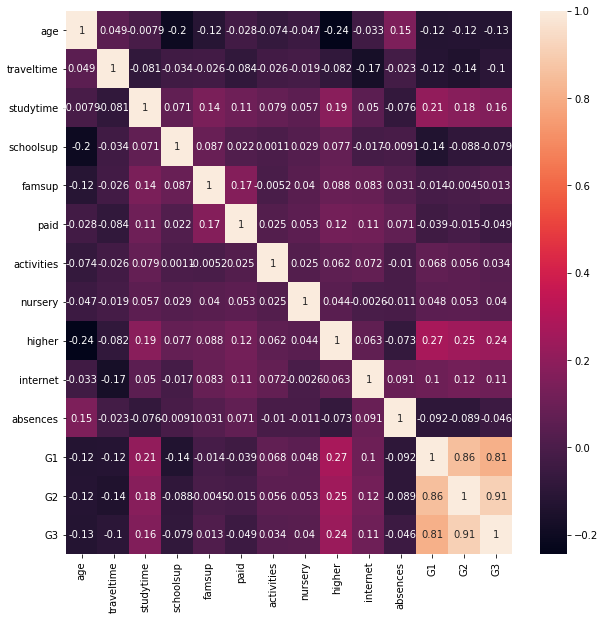

In [18]:
# your code here
numeric_data = data.drop(["ID", "health", "Walc", "Dalc", "goout", "freetime", "famrel", "failures"], axis=1)
numeric_data_corr = numeric_data.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(numeric_data_corr, annot=True);
# как видим, коэффициент корреляции почти везде незначительный (меньше 0.3), но есть зависимость G1, G2, G3

### Задание 7  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

In [19]:
# your code here


### Задание  8  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

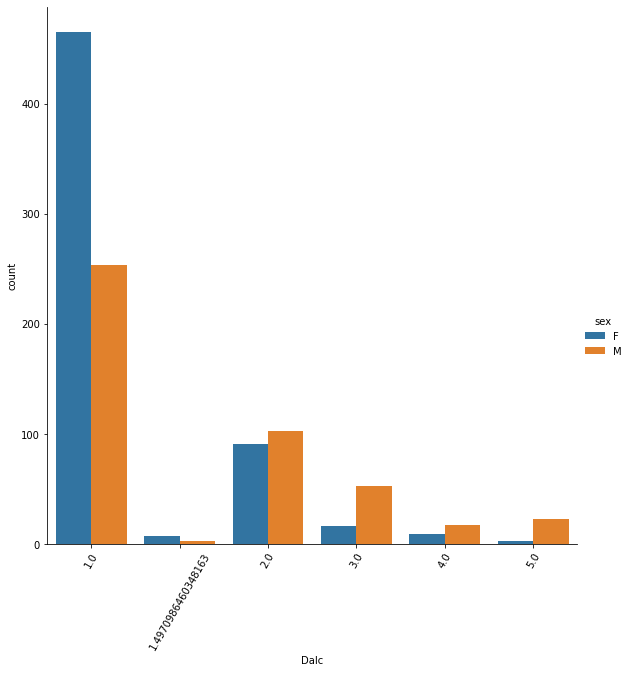

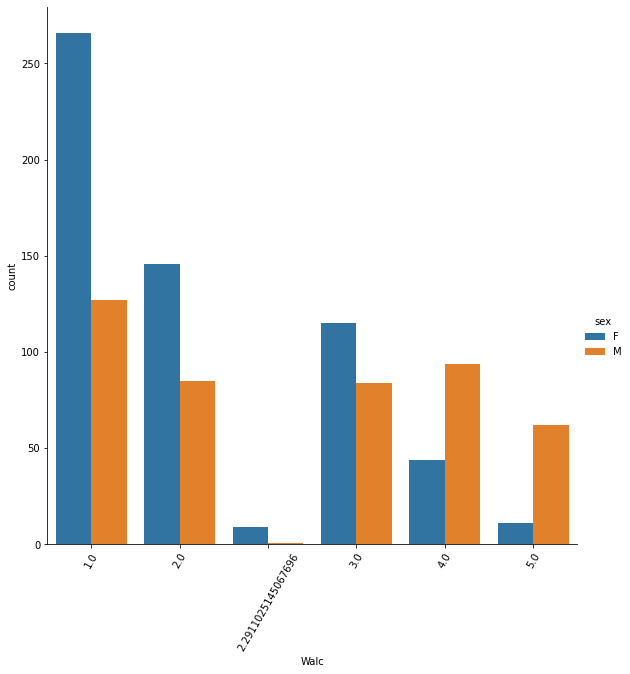

In [20]:
# your code here
sns.factorplot(x='Dalc', hue='sex', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
sns.factorplot(x='Walc', hue='sex', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
plt.show()
# парни пьют больше

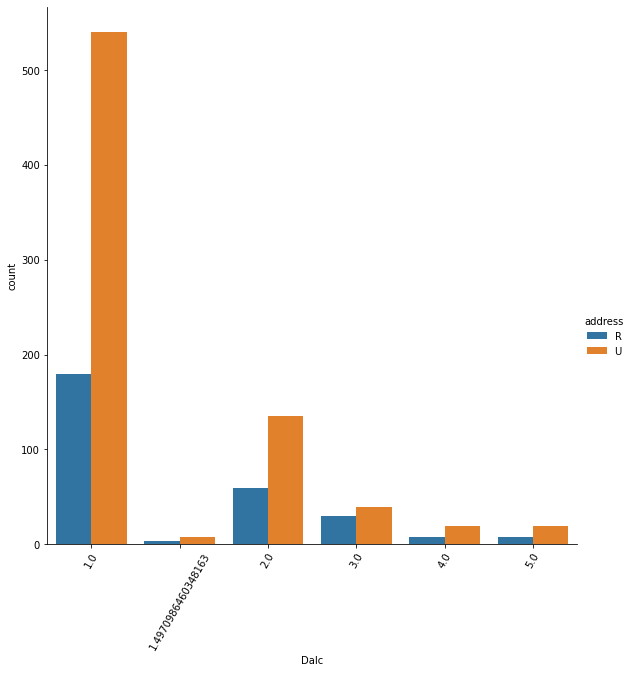

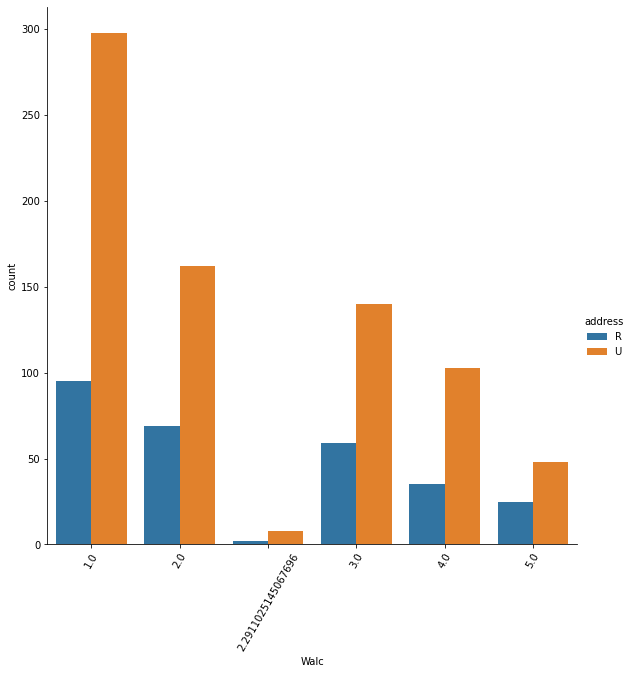

In [21]:
#address
sns.factorplot(x='Dalc', hue='address', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
sns.factorplot(x='Walc', hue='address', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
plt.show()

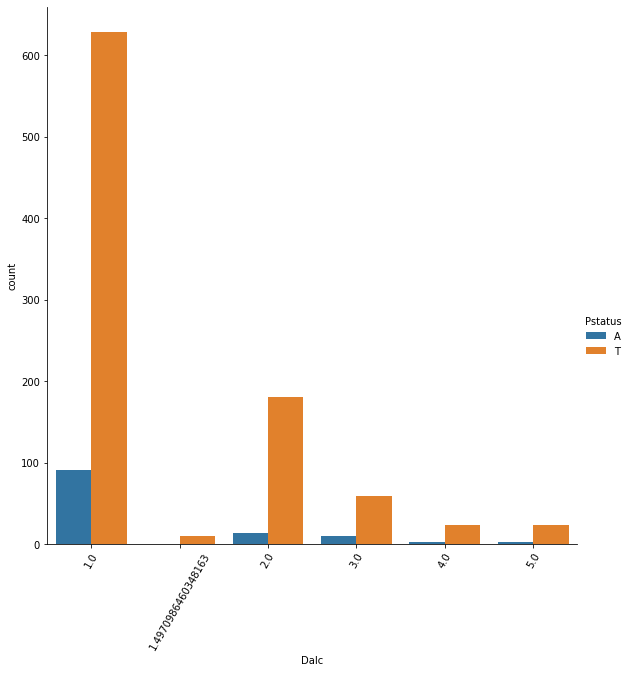

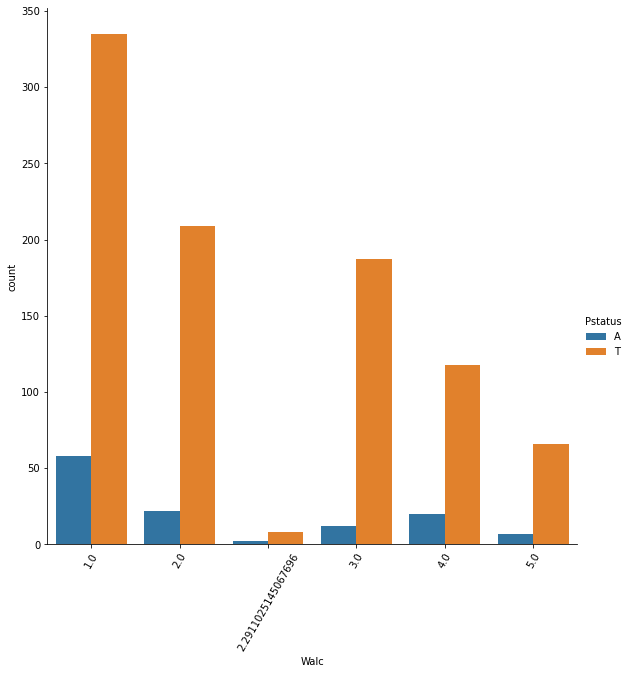

In [22]:
#Pstatus
sns.factorplot(x='Dalc', hue='Pstatus', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
sns.factorplot(x='Walc', hue='Pstatus', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
plt.show()

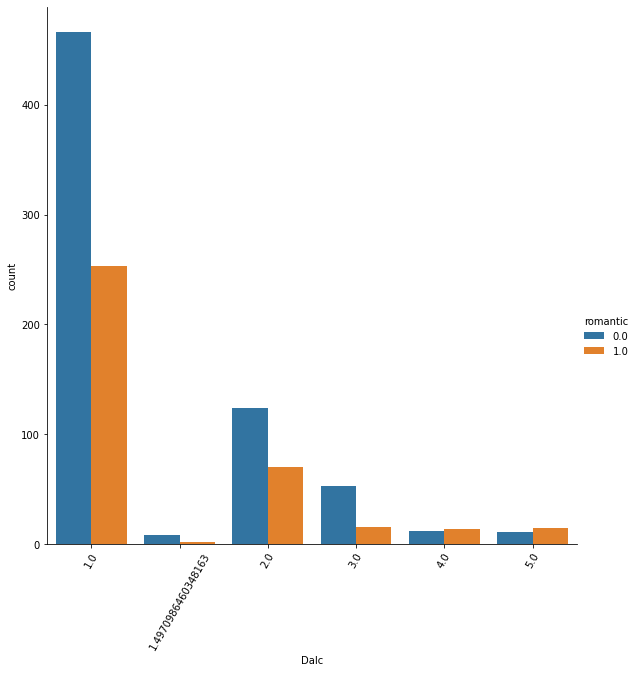

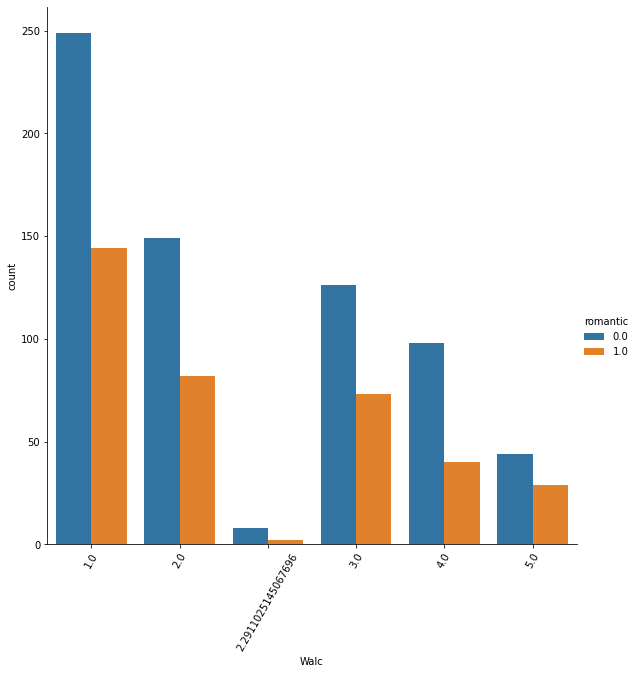

In [23]:
#romantic
sns.factorplot(x='Dalc', hue='romantic', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
sns.factorplot(x='Walc', hue='romantic', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
plt.show()

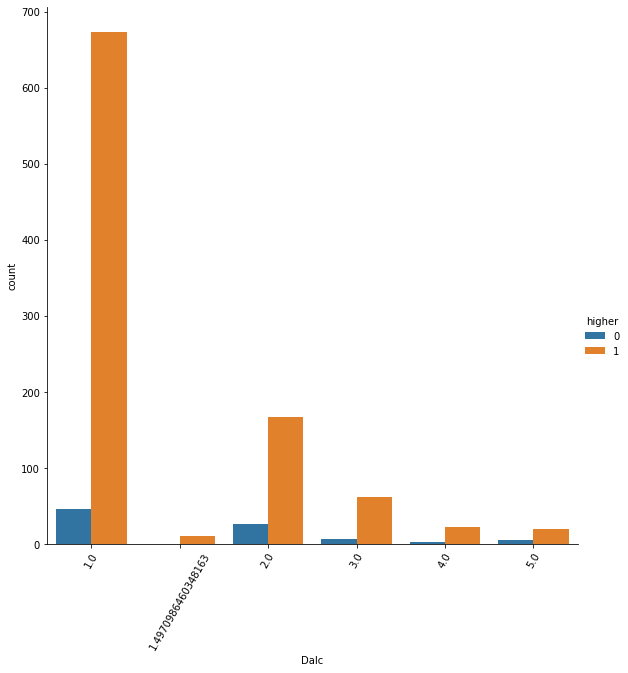

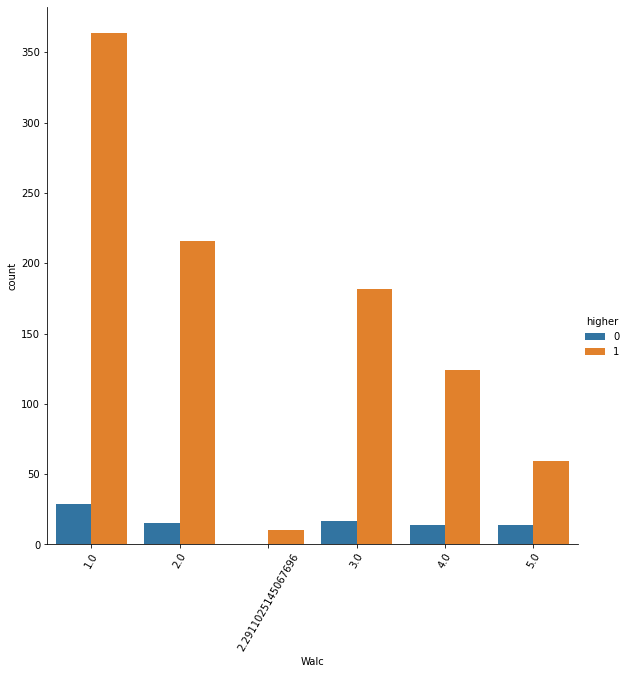

In [24]:
#higher
sns.factorplot(x='Dalc', hue='higher', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
sns.factorplot(x='Walc', hue='higher', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
plt.show()

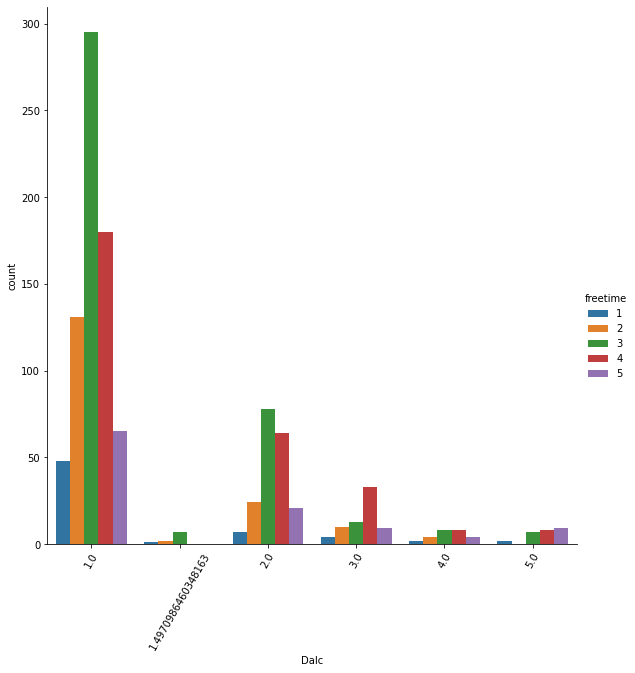

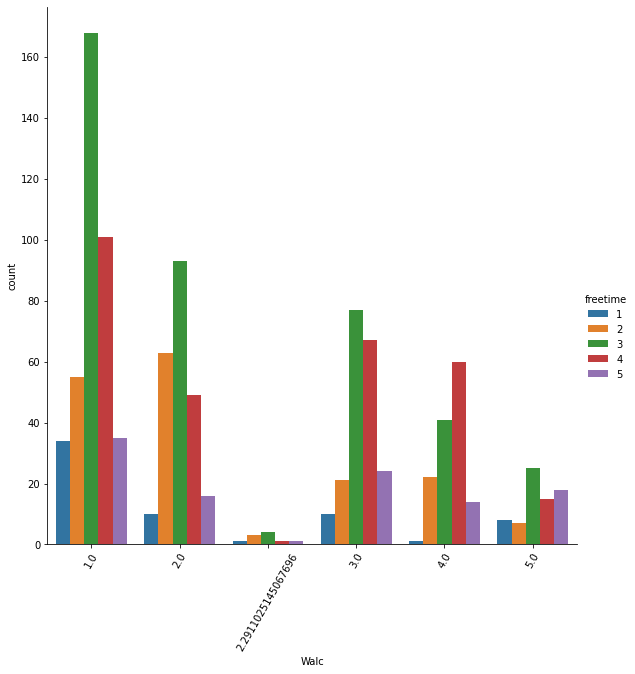

In [25]:
#freetime
sns.factorplot(x='Dalc', hue='freetime', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
sns.factorplot(x='Walc', hue='freetime', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
plt.show()

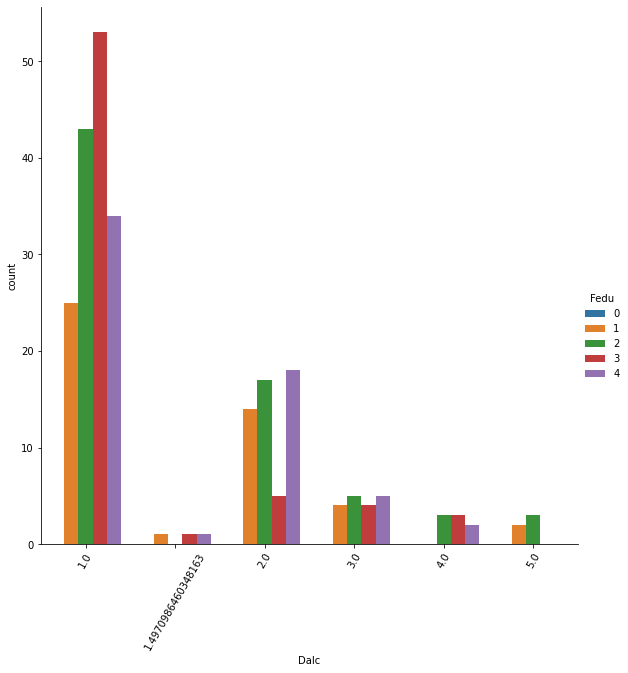

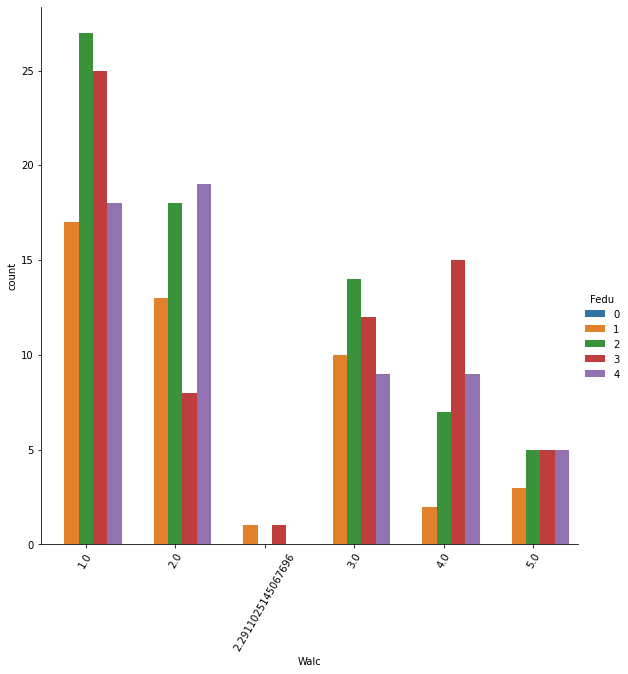

In [26]:
# Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).

kekf = data[data['guardian']=='father']
kekm = data[data['guardian']=='mother']

sns.factorplot(x='Dalc', hue='Fedu', data=kekf, kind='count', size = 8).set_xticklabels(rotation=60)
sns.factorplot(x='Walc', hue='Fedu', data=kekf, kind='count', size = 8).set_xticklabels(rotation=60)
plt.show()

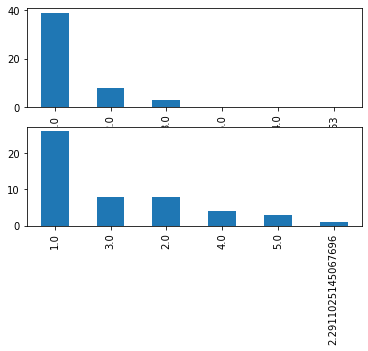

In [27]:

math_sort = data[data['Subject']=='Math'].sort_values(by=['G3'],ascending=False)
por_sort = data[data['Subject']=='Por'].sort_values(by=['G3'],ascending=False)
# 50 лучших 
plt.subplot(2, 1, 1)
math_sort.head(50)['Dalc'].value_counts().plot(kind='bar')
plt.subplot(2, 1, 2)
math_sort.head(50)['Walc'].value_counts().plot(kind='bar')
plt.show()

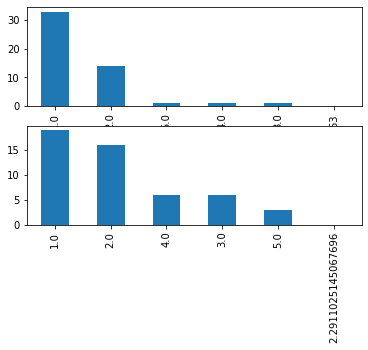

In [28]:
# 50 худших 
plt.subplot(2, 1, 1)
math_sort.tail(50)['Dalc'].value_counts().plot(kind='bar')
plt.subplot(2, 1, 2)
math_sort.tail(50)['Walc'].value_counts().plot(kind='bar')
plt.show()

In [29]:
#лучшие ученики пьют меньше и находятся только в первых 3 категориях по выпитому алкоголю
#худшие много пьют по выходным

### Задание 9     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

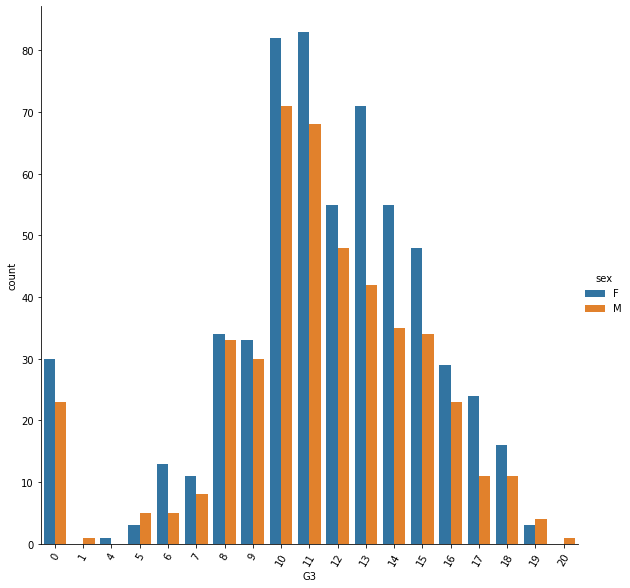

In [30]:
# Пол
sns.factorplot(x='G3', hue='sex', data=data, kind='count', size = 8).set_xticklabels(rotation=60);
# в среднем, девушки учатся лучше, но максимальные оценки получают, в основном, парни

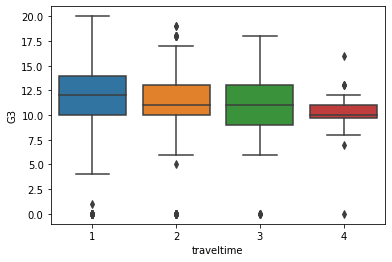

In [31]:
# Время в пути от дома до школы
sns.boxplot(x='traveltime', y='G3', data=data);
#максимальный балл чаще получают те, кто живут близко к школе
#у 2 и 3 группы совпадают медианы, они ведут себя примерно одинаково
#в 4 наибольшее количество удовлетворительных оценок

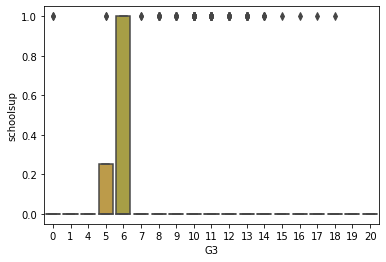

In [37]:
# Наличия дополнительной помощи в учебе (от членов семьи или вообще)
sns.boxplot(x='G3', y='schoolsup', data=data);

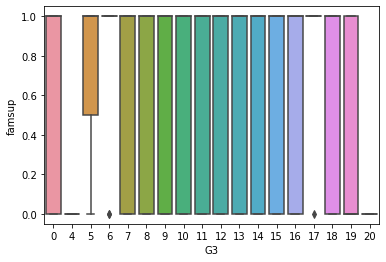

In [38]:
sns.boxplot(x='G3', y='famsup', data=data[data['Subject']=='Math']);

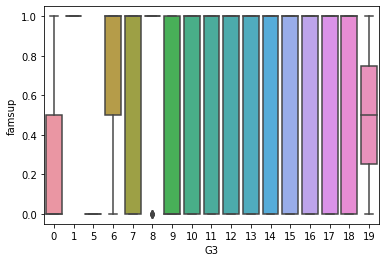

In [40]:
sns.boxplot(x='G3', y='famsup', data=data[data['Subject']=='Por']);
#есть много студентов, изучающих португальский, которые получают поддержку и учатся хорошо
#среди тех, кто изучает математику и получает поддержку, много оценок удовлетворительно, но есть и отличники

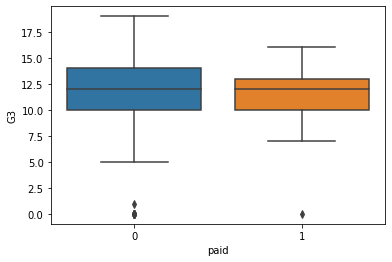

In [44]:
# Посещения платных дополнительных занятий
sns.boxplot(x='paid', y='G3', data=data[data['Subject']=='Por']);
#медианы и нижняя граница совпадают, но верхняя граница у тех, кто не ходит на дополнительные занятия - выше

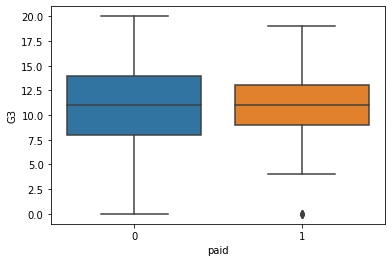

In [45]:
sns.boxplot(x='paid', y='G3', data=data[data['Subject']=='Math']);
#медианы снова совпадают, но границы - нет. в целом, трудно делать выводы о роли дополнительных занятий в успеваемости

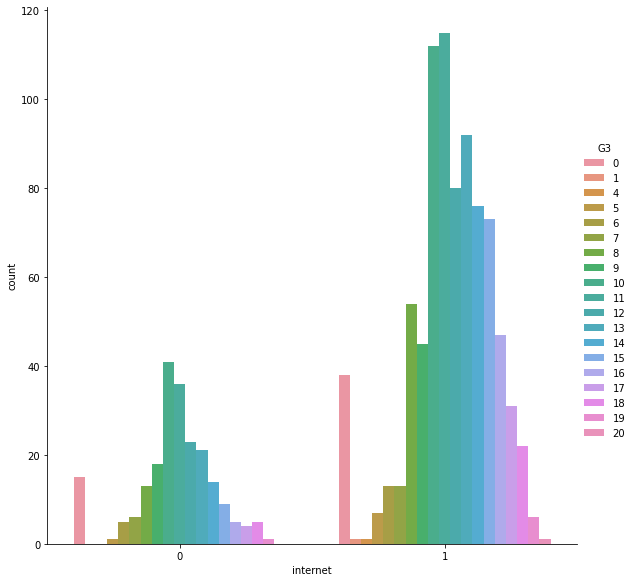

In [51]:
#Наличия интернета
sns.factorplot(x='internet', hue='G3', data=data, kind='count', size = 8).set_xticklabels();
#У тех, кто имеет доступ к интернету, оценки лучше

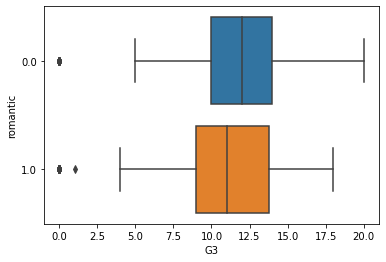

In [48]:
#* Наличия романтических отношений
sns.boxplot(x='G3', y='romantic', data=data);
#в среднем, люди без отношений учатся лучше

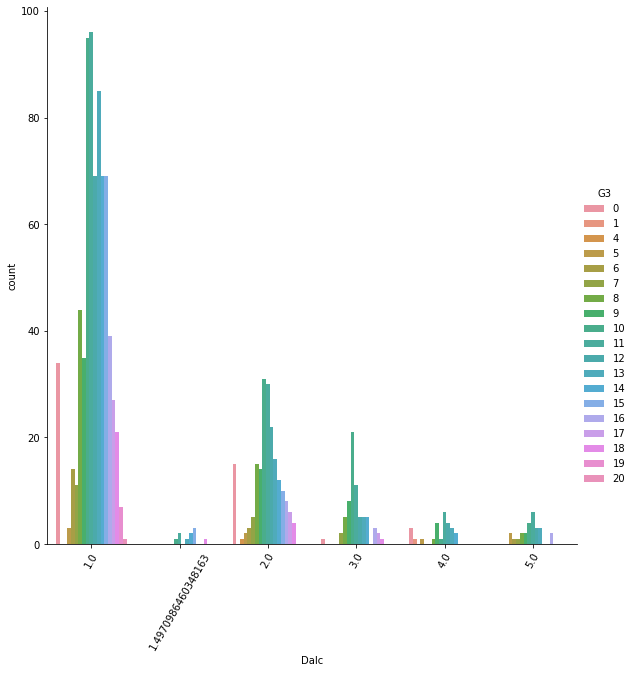

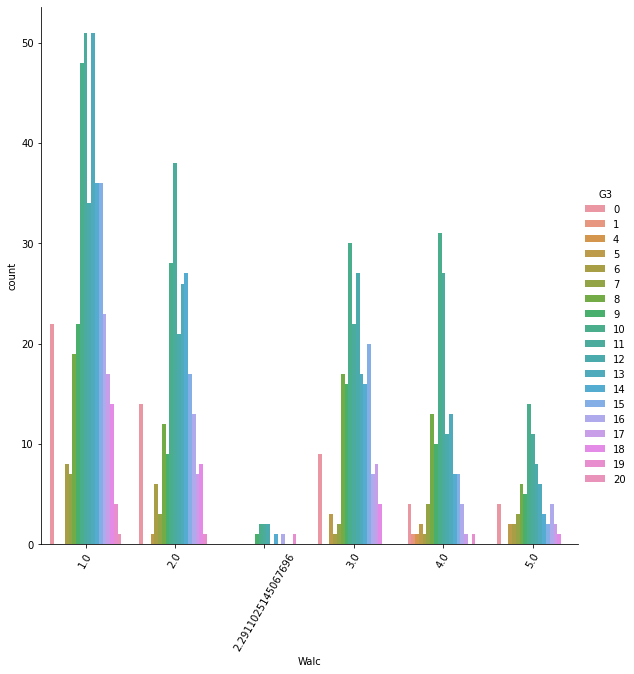

In [49]:
#Употребление алкоголя
sns.factorplot(x='Dalc', hue='G3', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
sns.factorplot(x='Walc', hue='G3', data=data, kind='count', size = 8).set_xticklabels(rotation=60)
plt.show()
#те кто пьют меньше, учатся лучше

### Задание 10  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [52]:
data['G3.5'] = 0
data['G3.4'] = 0
data['G3.3'] = 0
data['G3.2'] = 0
data['G3.5'] = np.where(18<= data['G3'],  5 , 0)
data['G3.4'] = np.where(np.logical_and(14<= data['G3'], data['G3']<=17),  4 , 0)
data['G3.3'] = np.where(np.logical_and(8<= data['G3'], data['G3']<=13),  3 , 0)
data['G3.2'] = np.where(data['G3']<8,  2 , 0)
data['G3_5'] = data.values[:, -4:].sum(1)

del data['G3.5']
del data['G3.4']
del data['G3.3']
del data['G3.2']

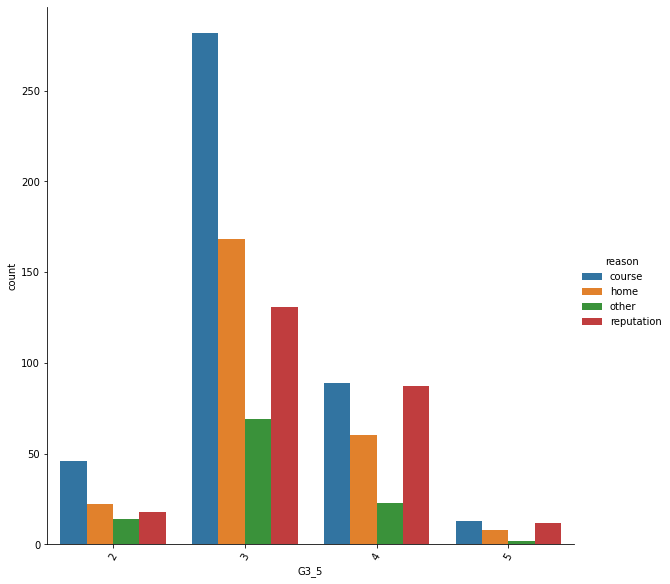

In [55]:
sns.factorplot(x='G3_5', hue='reason', data=data, kind='count', size = 8).set_xticklabels(rotation=60);
#топ причин для выбора школы: course, home, reputation
#при этом те, кто выбирали школу по курсам, имеют оценки хорошо и отлично, в среднем

### Задание  11 <a id="task11"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [67]:
# your code here
data.drop_duplicates()
data.shape
#количество строк совпадает с исходным, значит повторов нет?

(1044, 36)

### Задание 12  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [35]:
# your code here

### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [36]:
# your code here